# Customer Segmentation Using KMeans Clustering Method


In [31]:
# install required library and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [32]:
# load the csv

customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
customer_data.shape

(200, 5)

In [34]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
customer_data.isnull().sum()

# no null data value present in data

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [36]:
# Check Column Names

customer_data.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

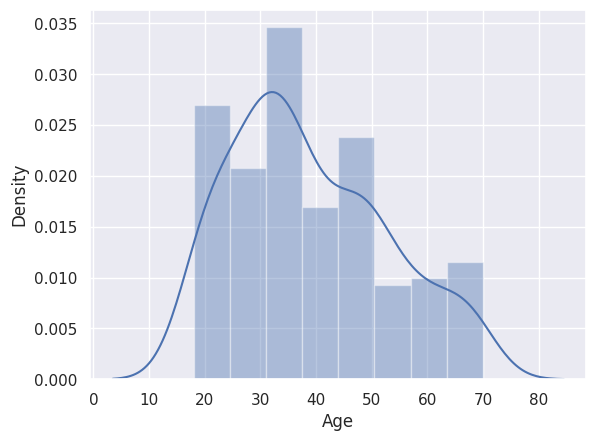

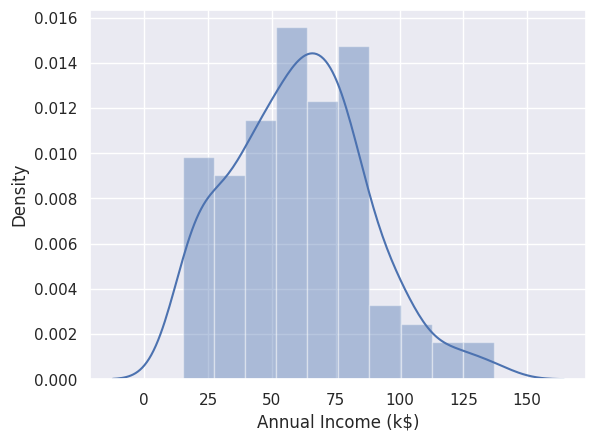

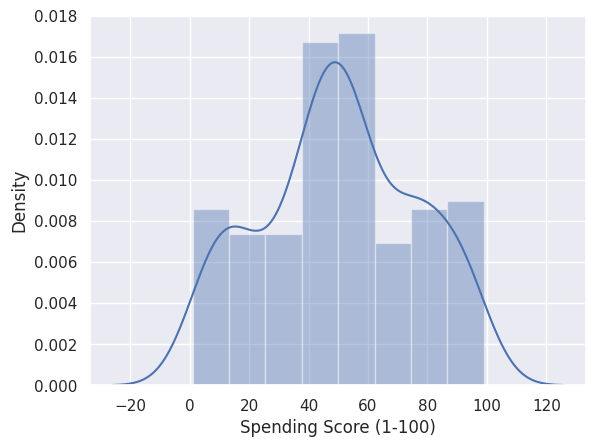

In [37]:
# generate density visuals (distplot) for columns

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
  plt.figure()
  sns.distplot(customer_data[i])

Lets Visualize all the columns with box plot

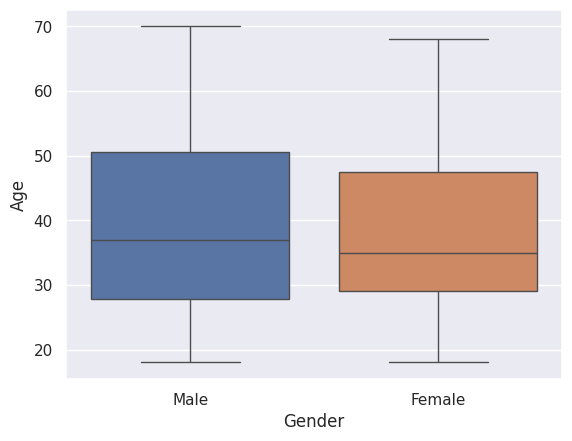

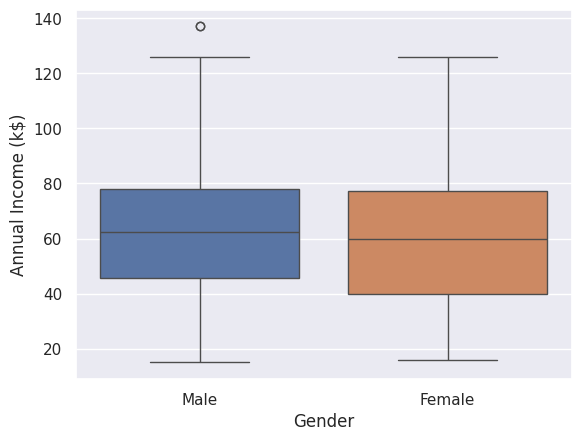

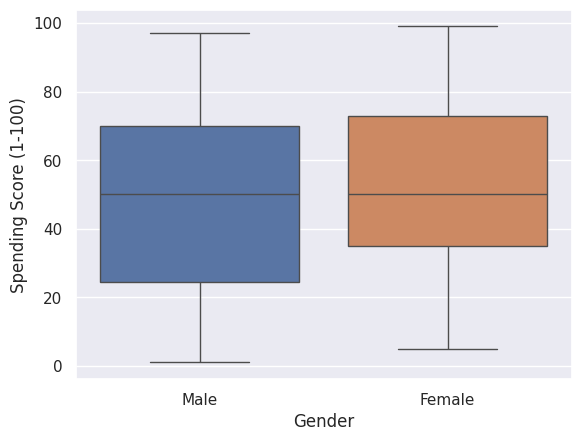

In [38]:
# lets visualise on basis of gender

for i in columns:
  plt.figure()
  sns.boxplot(data=customer_data, x = 'Gender', y = customer_data[i], hue=customer_data['Gender'])

# Insights gained from gender box plot visuals

1. Females are lesser in age than men
2. Annual Income of Women is less than Men
3. Women spend more than the men

# Using KMeans Clustering Method to segment the customers into clusters

In [39]:
X = customer_data.iloc[:,[3,4]].values

In [40]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Elbow Method (No of Joints)
Choosing no of clusters using wcss (within cluster sum of squares methods
) method

In [47]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


In [49]:
print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


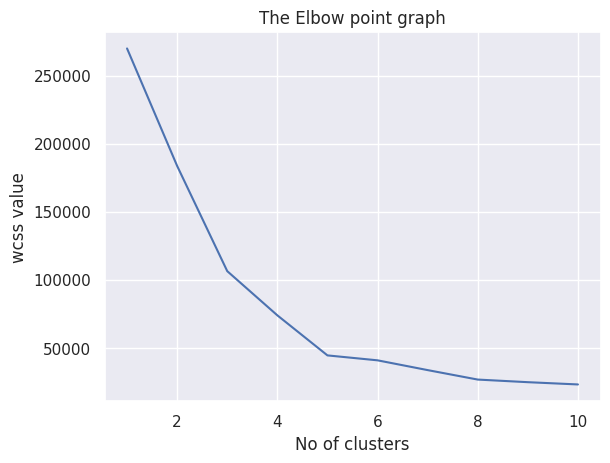

In [48]:
# plot the graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point graph")
plt.xlabel("No of clusters")
plt.ylabel("wcss value")
plt.show()

# the last elbow point is at 5
# means cluster-size = 5

optimum number of clusters = 5

Training the kmeans cluster model

In [43]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 0)

#return a label to data based on their cluster

Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


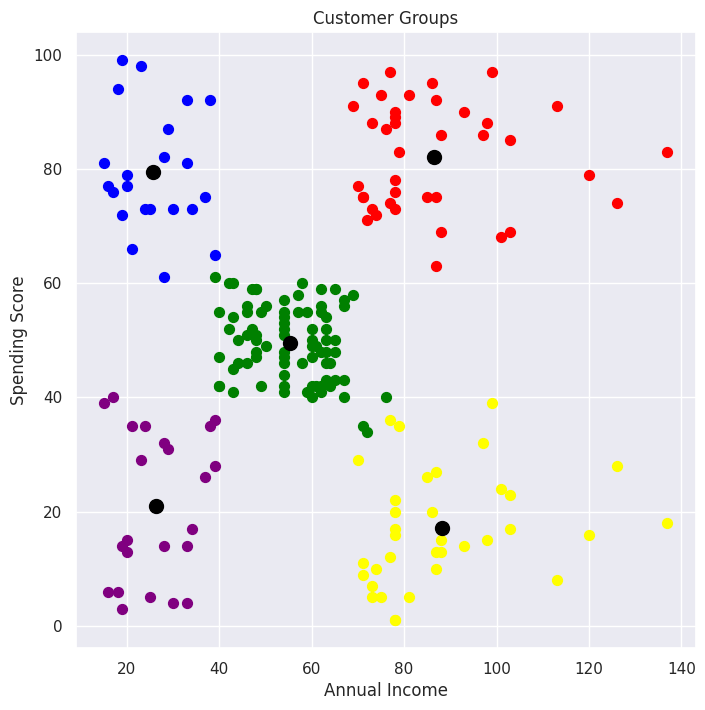

In [44]:
# plotting the graph

plt.figure(figsize=(8,8))

plt.scatter(X[Y==0,0], X[Y==0,1],s=50, c='green', label = 'cluster 1' )
plt.scatter(X[Y==1,0], X[Y==1,1],s=50, c='red', label = 'cluster 2' )
plt.scatter(X[Y==2,0], X[Y==2,1],s=50, c='yellow', label = 'cluster 3' )
plt.scatter(X[Y==3,0], X[Y==3,1],s=50, c='purple', label = 'cluster 4' )
plt.scatter(X[Y==4,0], X[Y==4,1],s=50, c='blue', label = 'cluster 5' )

# plot the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label = 'centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Quick Insights gain

1. Cluster 4(Purple) - people are earning as well as spending less
2. Cluster 5(Blue) - people are earning low but spendeing more
3. Cluster 3(Yellow) - People with high income but spending less
4. Cluster 2(Red) - People Higher Income with High Spending
5. Cluster 1(Green) - People have good earning and are also spending in good amount


# Actions to take

1. Launch some offer and cashback for cluster 4/3 so that they spend more
2. cluster 1 is spending good amount but to make them spend more release some offers for them

# Final Actions from Data Set

1. Focus More on people who are earning more but not spending enough
2. Women are already spending so try to get the attention of Men by giving offer for men